In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
import re
def parse_data(data):
    str_data  = re.findall(r"[-+]?(?:\d*\.*\d+)", data)
    return float(str_data[0])

In [49]:
file_name = "1e-4 LR, with Neg_Pos_ratio set to 1.txt"
with open(file_name) as f:
    lines = f.readlines()
    
    log_file_list = list()
    for line in lines:
        if len(line.split(' ')) > 2:
            temp_ = list()
            for data in line.split('-')[2:]:
                temp_.append(parse_data(data))
            log_file_list.append(temp_)
            
    column_name = ['loss', 'loc_loss', 'conf_loss', 'loc_accuracy', 'conf_accuracy', 'val_loss', 'val_loc_loss', 'val_conf_loss', 'val_loc_accuracy', 'val_conf_accuracy']
    
    df = pd.DataFrame(log_file_list, columns = column_name)
    
df.head(10)

,loss,loc_loss,conf_loss,loc_accuracy,conf_accuracy,val_loss,val_loc_loss,val_conf_loss,val_loc_accuracy,val_conf_accuracy
0,7.1766,1.4807,5.6959,0.0931,0.8984,8.9284,1.8616,7.0668,0.0701,0.9902
1,5.0533,0.9606,4.0926,0.1043,0.9904,6.5560,1.3517,5.2043,0.1438,0.9902
2,4.2761,0.7504,3.5257,0.1529,0.9907,5.3152,1.0921,4.2230,0.1769,0.9903
3,3.6333,0.6393,2.9940,0.1744,0.9913,4.6896,1.0225,3.6671,0.1964,0.9905
4,3.0749,0.5665,2.5085,0.1832,0.9921,4.0512,0.9189,3.1323,0.1856,0.9910
5,2.5967,0.5182,2.0785,0.1830,0.9928,3.8940,0.9365,2.9575,0.1830,0.9914
6,2.1867,0.4747,1.7120,0.1841,0.9936,3.5120,0.8553,2.6567,0.1744,0.9918
7,1.8464,0.4336,1.4128,0.1843,0.9942,3.7857,1.0028,2.7830,0.1731,0.9920
8,1.5753,0.3964,1.1789,0.1837,0.9948,3.4037,0.9180,2.4857,0.1748,0.9923
9,1.3607,0.3630,0.9977,0.1859,0.9952,3.3802,0.8933,2.4869,0.1685,0.9927


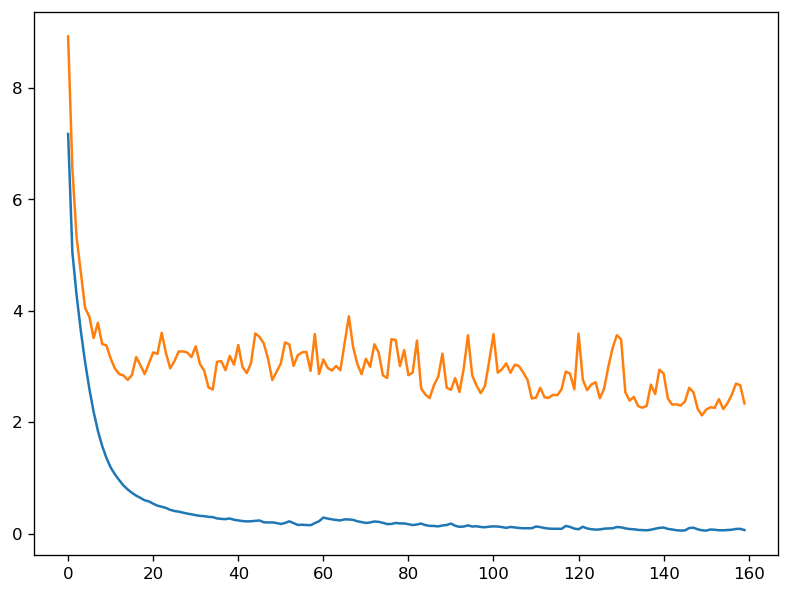

In [51]:
plt.figure(figsize = (8, 6), dpi = 120)
plt.plot(df['loss'])
plt.plot(df['val_loss'])
plt.show()

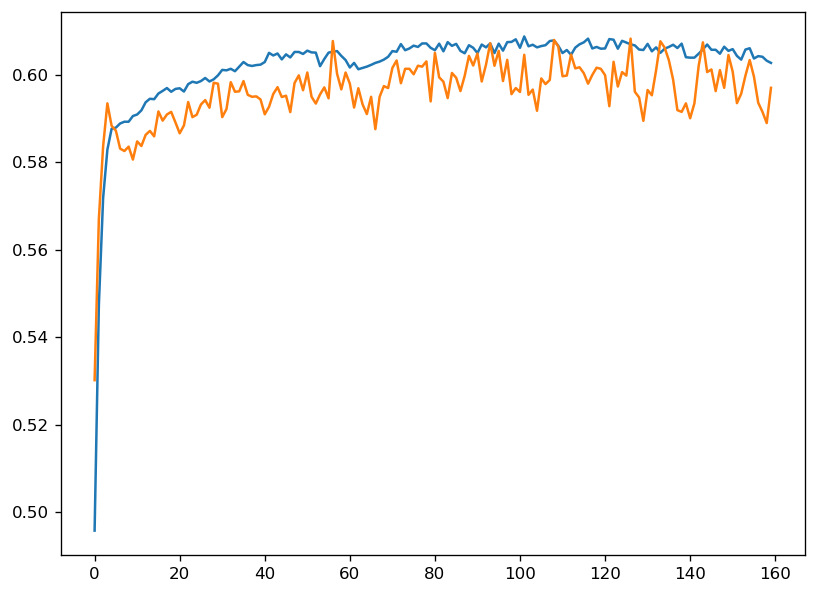

In [50]:
plt.figure(figsize = (8, 6), dpi = 120)
train_accuracy = list(map(lambda x, y: (x + y) / 2, df['loc_accuracy'], df['conf_accuracy']))
validation_accuracy = list(map(lambda x, y: (x + y) / 2, df['val_loc_accuracy'], df['val_conf_accuracy']))
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.show()